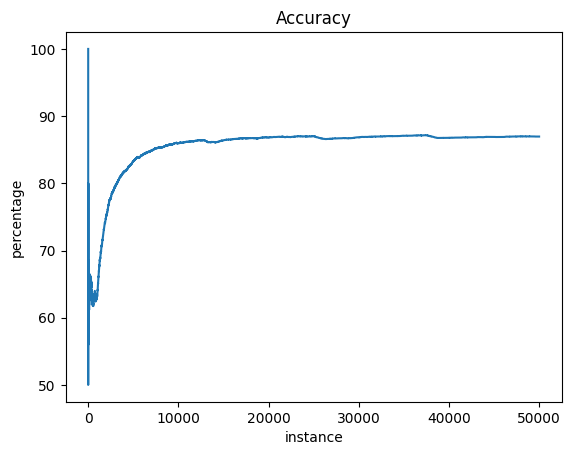

In [3]:
import os
from river import evaluate, metrics, neighbors, stream

# o iter_csv lê os dados do arquivo como string, por essa 
# razão é necessário converter os dados para tipos numéricos
converter = {'x':float, 'y': float, 'class':int}
drop = ['z']
target = 'class'
dataset = stream.iter_csv(
    'river/datasets/sea.csv', 
    converters=converter, 
    target=target,
    drop=drop)

# o modelo SAMKNNClassifier foi adicionado manualmente ao river
# a partir do código disponível na versão 0.10.1, por razões
# internas do river, o modelo não foi adicionado às demais versões
model = neighbors.SAMKNNClassifier(
    window_size=1000, 
    n_neighbors=3)


metric = metrics.Accuracy()
delay = 1000

os.makedirs('results/sea', exist_ok=True)
with open('results/sea/sea.csv', 'w') as f:
    metric = evaluate.progressive_val_score(
        dataset, 
        model, 
        metric, 
        delay=delay, 
        print_every=1, 
        file=f)

try:
    reader = open('results/sea/sea.csv', 'r')
    dicti = {}
    Lines = reader.readlines()
    for row in Lines:
        colunas = row.split()
        n_answer = int(colunas[0].strip("[]").replace(',',''))
        metric_title = colunas[1].strip(":")
        percentage = float(colunas[2].strip("%"))
        if dicti.get(metric_title) is None: 
            dicti[metric_title] = {}
        dicti[metric_title].update({n_answer :percentage})
except OSError:
    print ("Could not open/read file:", file)
    exit()

import matplotlib.pyplot as plt

for metric_key in dicti.keys():
    plt.figure()
    plt.title(metric_key)
    plt.xlabel('instance')
    plt.ylabel('percentage')
    plt.plot(dicti[metric_key].keys(), dicti[metric_key].values())